# Bacterial Spectrometry

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image
im = Image.open("bacteria.jpg")

## Detect intensity of bacterial fluorescence

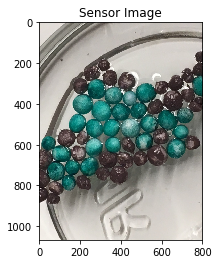

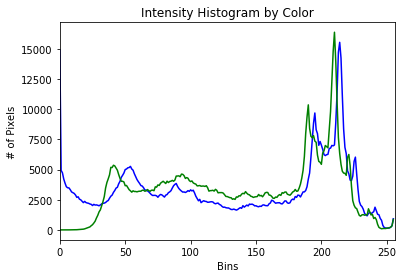

In [3]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks,hough_ellipse
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import img_as_float
import matplotlib.patches as mpatches

cvimage = cv2.imread('bacteria.jpg')
image_rgb = cv2.cvtColor(cvimage,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Sensor Image")
plt.show()

# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image_rgb)
colors = ("b", "g") # Exclude red for demo
plt.figure()
plt.title("Intensity Histogram by Color")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
    
plt.show()
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
# image_gray = cv2.convertScaleAbs(image_gray)
# plt.imshow(image_gray)
# plt.show()

## Provide user with notifications

In [ ]:
green_minimum = 0.4
blue_minimum = 0.5
if green < green_minimum:
    print("Warning: Microbiome imbalanced")
if blue < blue_minimum:
    print("Warning: Microbiome imbalanced")

## Display user's microbiomic fingerprint

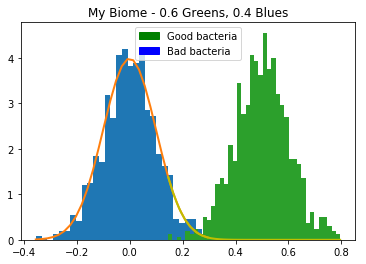

In [11]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * \
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), \
         linewidth=2)
t = s + 0.5
count, bins, ignored = plt.hist(t, 40, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * \
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), \
         linewidth=2, color='y')
blue_patch = mpatches.Patch(color='blue', label='Bad bacteria')
green_patch = mpatches.Patch(color='green', label='Good bacteria')
plt.legend(handles=[green_patch,blue_patch])
plt.title("My Biome - 0.6 Greens, 0.4 Blues")
plt.show()